## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [1]:
import torch
import torch.nn as nn
from collections import OrderedDict


In [7]:
# your code here
model1 = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(2, 2)),
    ('sigmoid1', nn.Sigmoid()),
    ('fc2', nn.Linear(2, 2)),
    ('sigmoid2', nn.Sigmoid())
]))

In [10]:
print(model1)

Sequential(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (sigmoid1): Sigmoid()
  (fc2): Linear(in_features=2, out_features=2, bias=True)
  (sigmoid2): Sigmoid()
)


In [6]:
# your code here
data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
print(data_in)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [12]:
# your code here
data_target = torch.tensor([[0, 0], [0, 1], [0, 1], [1, 0]], dtype=torch.float)
print(data_target)

tensor([[0., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.]])


In [11]:
# your code here
criterion = nn.BCELoss()
optimizer = optim.Adam(model1.parameters())

In [13]:
# your code here
# Train the model
for epoch in range(10000):
    optimizer.zero_grad()
    output = model_a(data_in)
    loss = criterion(output, data_target)
    loss.backward()
    optimizer.step()

In [15]:
# your code here
# visualize the resuts
with torch.no_grad():
    output = model1(data_in)
    loss = criterion(output, data_target)
    acc = ((output> 0.5) == data_target).all(dim=1).float().mean()

print("Loss: {}, Accuracy: {}".format(loss, acc))

Loss: 0.6377874612808228, Accuracy: 0.5


In [16]:
# your code here
# print model wights

print("Weights:")
for name, param in model1.named_parameters():
    if 'weight' in name:
        print(name, param)

Weights:
fc1.weight Parameter containing:
tensor([[-0.2330,  0.5564],
        [-0.3924,  0.4677]], requires_grad=True)
fc2.weight Parameter containing:
tensor([[-0.5305,  0.1111],
        [ 0.7005,  0.1177]], requires_grad=True)


In [27]:
import torch
import torch.nn as nn
from collections import OrderedDict

# Model 1
model1 = nn.Sequential(OrderedDict([('fc1', nn.Linear(2, 1)),('sigmoid', nn.Sigmoid())]))

# Model 2
model2 = nn.Sequential(OrderedDict([('fc1', nn.Linear(2, 2)),('relu', nn.ReLU()),('fc2', nn.Linear(2, 1)),('sigmoid', nn.Sigmoid())]))

# Model 3
model3 = nn.Sequential(OrderedDict([('fc1', nn.Linear(2, 4)),('relu', nn.ReLU()),('fc2', nn.Linear(4, 1)),('sigmoid', nn.Sigmoid())]))

# Define the dataset
X_train = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_train = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.1)
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.1)
optimizer3 = torch.optim.SGD(model3.parameters(), lr=0.1)

# Train the models
for epoch in range(1000):
    # Model 1
    optimizer1.zero_grad()
    y_pred1 = model1(X_train)
    loss1 = criterion(y_pred1, y_train)
    loss1.backward()
    optimizer1.step()

    # Model 2
    optimizer2.zero_grad()
    y_pred2 = model2(X_train)
    loss2 = criterion(y_pred2, y_train)
    loss2.backward()
    optimizer2.step()
    
    optimizer3.zero_grad()
    y_pred3 = model3(X_train)
    loss3 = criterion(y_pred3, y_train)
    loss3.backward()
    optimizer3.step()



In [6]:
with torch.no_grad():
    output_a = model1(X_train)
    loss_a = criterion(output_a, y_train)
    acc_a = ((output_a > 0.5) == y_train).all(dim=1).float().mean()

    output_b = model2(X_train)
    loss_b = criterion(output_b, y_train)
    acc_b = ((output_b > 0.5) == y_train).all(dim=1).float().mean()

    output_c = model3(X_train)
    loss_c = criterion(output_c, y_train)
    acc_c = ((output_c > 0.5) == y_train).all(dim=1).float().mean()

print("Network A - Loss: {}, Accuracy: {}".format(loss_a, acc_a))
print("Network B - Loss: {}, Accuracy: {}".format(loss_b, acc_b))
print("Network C - Loss: {}, Accuracy: {}".format(loss_c, acc_c))

Network A - Loss: 0.6931473612785339, Accuracy: 0.75
Network B - Loss: 0.6931471824645996, Accuracy: 0.5
Network C - Loss: 0.6931588649749756, Accuracy: 0.5


In [7]:
print("Weights for Network B:")
for name, param in model2.named_parameters():
    if 'weight' in name:
        print(name, param)
        
print("Weights for Network C:")
for name, param in model3.named_parameters():
    if 'weight' in name:
        print(name, param)

Weights for Network B:
fc1.weight Parameter containing:
tensor([[ 0.3389, -0.3712],
        [-0.3476,  0.4740]], requires_grad=True)
fc2.weight Parameter containing:
tensor([[-0.4480, -0.0333]], requires_grad=True)
Weights for Network C:
fc1.weight Parameter containing:
tensor([[-0.2266,  0.5640],
        [ 0.1517, -0.0569],
        [-0.2324,  0.4193],
        [ 0.4100,  0.5991]], requires_grad=True)
fc2.weight Parameter containing:
tensor([[-0.0699, -0.1174,  0.1135,  0.0518]], requires_grad=True)


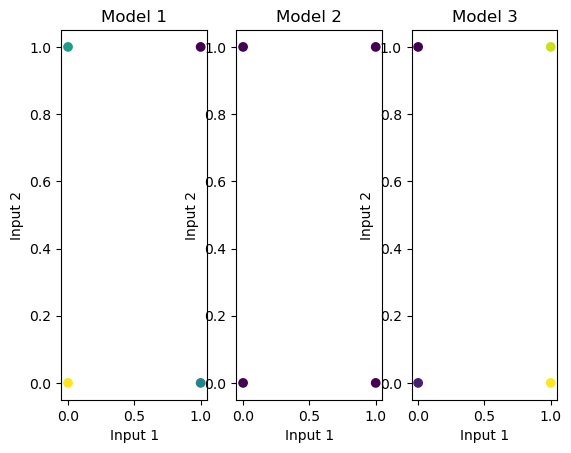

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Define the test inputs
X_test = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)

# Model 1
y_pred1 = model1(X_test).detach().numpy()
plt.subplot(1, 3, 1)
plt.title("Model 1")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred1, cmap='viridis')
plt.xlabel("Input 1")
plt.ylabel("Input 2")

# Model 2
y_pred2 = model2(X_test).detach().numpy()
plt.subplot(1, 3, 2)
plt.title("Model 2")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred2, cmap='viridis')
plt.xlabel("Input 1")
plt.ylabel("Input 2")

# Model 3
y_pred3 = model3(X_test).detach().numpy()
plt.subplot(1, 3, 3)
plt.title("Model 3")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred3, cmap='viridis')
plt.xlabel("Input 1")
plt.ylabel("Input 2")

plt.show()